In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings ('ignore')

# **Load dataset**

In [12]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


Read Dataset pandas library

In [13]:
df=pd.read_csv('titanic.csv')
# print(df)

# **Exploratory Data Analysis  and Preprocessing**

Dataset summary / information

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Distribution of a Dataset.

In [15]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


 Display the first 5 rows of a Dataset

In [16]:
print(df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


 Display the last 5 rows of a Dataset

In [17]:
print(df.tail(5))

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


Display the column names

In [18]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


How many rows & columns

In [19]:
print(df.shape)

(891, 12)


Count the number of duplicate rows

In [20]:
print(df.duplicated().sum)

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool>


Check null values

In [21]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Visualizing missing data in a Dataset.**Missingno** is a specialized library

In [22]:
import matplotlib.pyplot as plt
import missingno as ms

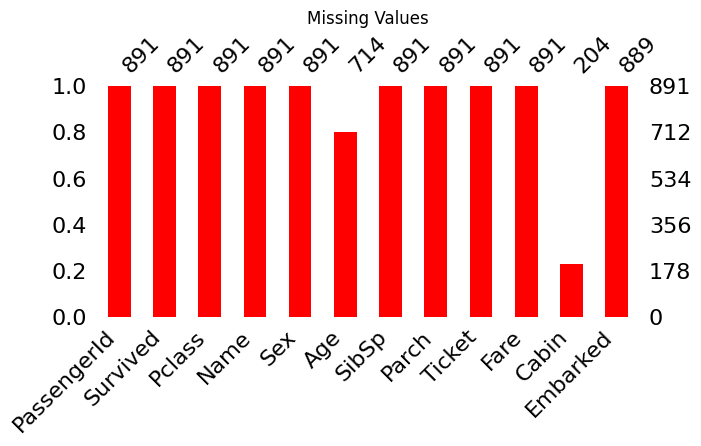

In [23]:
ms.bar(df,figsize=(7,3), color='red')
plt.title('Missing Values')
plt.show()

# ***Preprocessing & Feature Engineering Techniques***

Low Data Cabin columns Droped

In [24]:
df.drop(['Cabin'], axis=1, inplace=True)

In [25]:
print(df.columns)
print(df.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
(891, 11)


Embarked column check unique values

In [26]:
print(df['Embarked'].unique())
print(df['Embarked'].value_counts())

['S' 'C' 'Q' nan]
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Embarked column Missing values filling most data 'S'

In [27]:
df['Embarked']=df['Embarked'].fillna('S')

Age column check unique values

In [28]:
print(df['Age'].value_counts())

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64


How to fill Age missing value check

In [29]:
print("Age mean=",df['Age'].mean())
print("Age median=",df['Age'].median())
print("Age mode=",df['Age'].mode())

Age mean= 29.69911764705882
Age median= 28.0
Age mode= 0    24.0
Name: Age, dtype: float64


probably suitable mean, fill missing value to mean

In [30]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [31]:
print(df["Age"].isnull().sum())

0


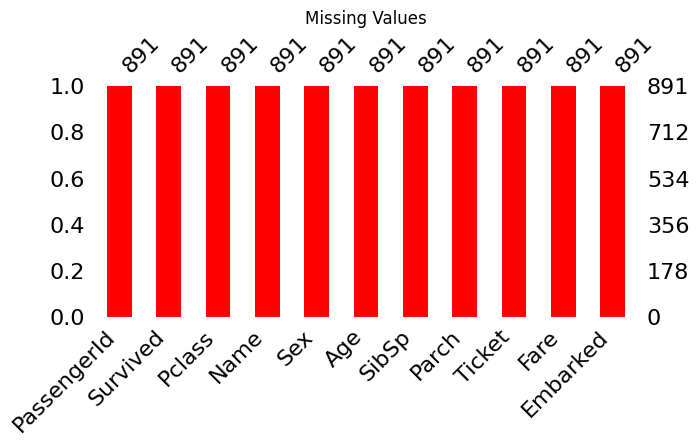

In [32]:
ms.bar(df,figsize=(7,3), color='red')
plt.title('Missing Values')
plt.show()

Survived column check unique values

In [33]:
print(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


Survived & un Survived total Count Graph

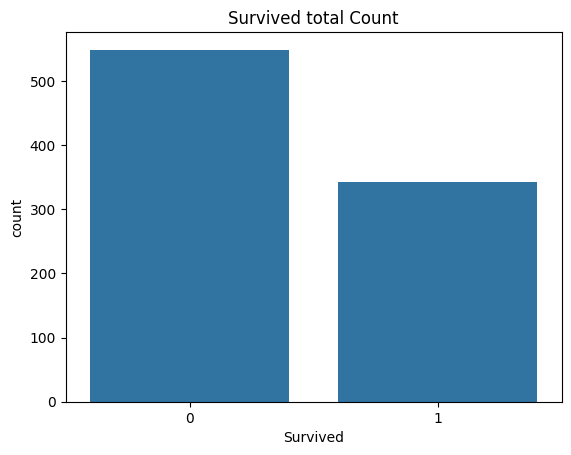

In [34]:
import seaborn as sns
sns.countplot(x='Survived', data=df)
plt.title('Survived total Count')
plt.show()

Gender values Graph

In [35]:
print(df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


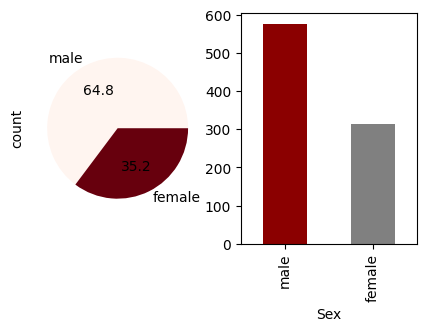

In [36]:
fig,axes = plt.subplots(1,2,figsize=(5,3))
df['Sex'].value_counts().plot(kind='bar', ax=axes[1],color=['Darkred','gray'])
df['Sex'].value_counts().plot(kind='pie', ax=axes[0],autopct = '%0.1f',colormap="Reds")
plt.show()



Gender based on survived

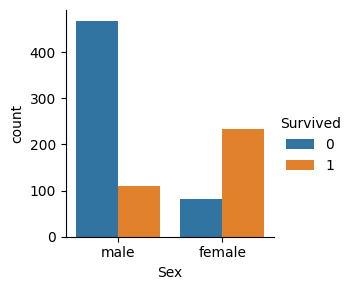

In [37]:
sns.catplot(x="Sex",hue="Survived", kind="count",data=df,height=3,)
plt.show()

passenger class based on survived

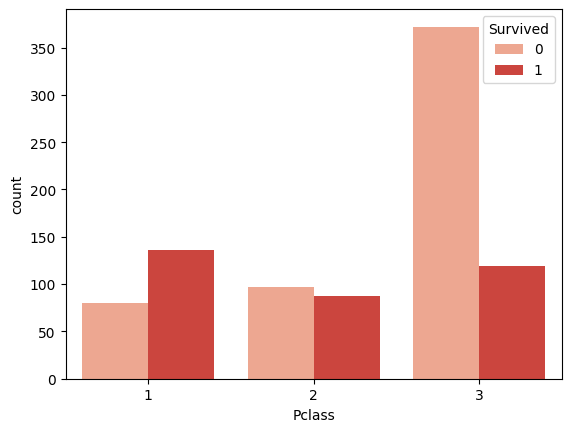

In [38]:
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Reds",)
plt.show()

Drop unnecessary column

In [39]:
df.drop(["Name","Ticket","PassengerId"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


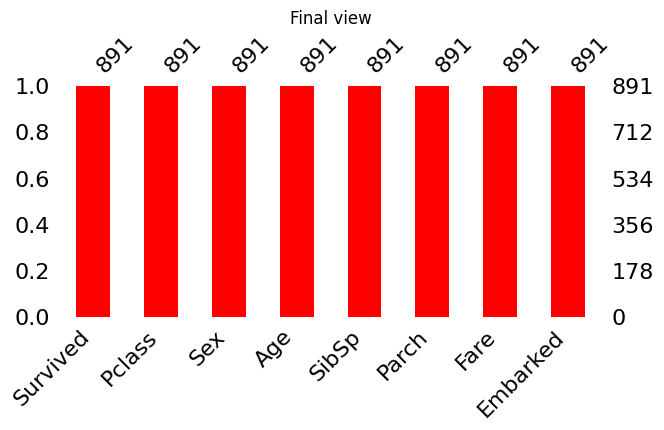

In [40]:
ms.bar(df,figsize=(7,3), color='red')
plt.title('Final view')
plt.show()

Encoding Categorical data converted numerical data

In [41]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


In [43]:
df['Age'] = df['Age'].replace(np.nan, 0)
df['Embarked'] = df['Embarked'].replace(np.nan, 0)

print(df)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.000000      1      0   7.2500         2
1           1       1    0  38.000000      1      0  71.2833         0
2           1       3    0  26.000000      0      0   7.9250         2
3           1       1    0  35.000000      1      0  53.1000         2
4           0       3    1  35.000000      0      0   8.0500         2
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    1  27.000000      0      0  13.0000         2
887         1       1    0  19.000000      0      0  30.0000         2
888         0       3    0  29.699118      1      2  23.4500         2
889         1       1    1  26.000000      0      0  30.0000         0
890         0       3    1  32.000000      0      0   7.7500         1

[891 rows x 8 columns]


**Split data into training and testing sets**

In [44]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]

In [45]:
print("IP=",x)
print("OT=",y)

IP=      Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]
OT= 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Split the Data

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [47]:
print("DF",df.shape)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

DF (891, 8)
x_train (712, 7)
x_test (179, 7)
y_train (712,)
y_test (179,)


# **Model Training**

**import algorithms and libraries**

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [49]:
models = {
    "Naive Bayes": GaussianNB(),
     "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

In [50]:
model_performance = {}
#TM = titanic model
for TM, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

    #  Train Model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculate Accuracy
    acc = accuracy_score(y_test, y_pred)
    model_performance[TM] = acc  # Add this line to populate the dictionary

In [51]:
    # Final Report
    print(f"\nModel: {TM}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    print(f"Model Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Cross-Validation Accuracy: 0.7978
Model Accuracy: 0.7989
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.80      0.72      0.76        79

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [52]:
best_model_name = max(model_performance, key=model_performance.get)
best_model = models[best_model_name]


print(f"Best Model: {best_model_name} with Accuracy: {model_performance[best_model_name]*100:.2f}%")

Best Model: Logistic Regression with Accuracy: 79.89%


In [53]:
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("\nModel saved successfully as 'best_model.pkl'")


Model saved successfully as 'best_model.pkl'


In [54]:
from google.colab import files

files.download('best_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>